In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import anndata
import os
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
import pickle

In [2]:
np.random.seed(0)

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

-----
anndata     0.7.6
scanpy      1.7.0
sinfo       0.3.1
-----
PIL                 8.3.0
anndata             0.7.6
anyio               NA
attr                21.2.0
babel               2.9.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
cairo               1.20.1
certifi             2021.05.30
cffi                1.14.4
chardet             4.0.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
debugpy             1.3.0
decorator           5.0.9
defusedxml          0.7.1
dunamai             1.5.5
get_version         3.2
google              NA
h5py                3.3.0
idna                2.10
igraph              0.8.3
ipykernel           6.0.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              3.0.1
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.9.0
jupyterlab_server   2.6.0
kiwisolver  

In [4]:
save_path= '../results/log_regression/'

In [5]:
# my train data
#adata_P13 = sc.read('../../cellranger/data/adata_raw_sc_and_sn_with_unified_annotation_upd_20210914.h5ad')
adata_P13 = sc.read('../../MFIdata_anna/adata_raw_filtered_annotated.h5ad')

In [6]:
# my test data
adata_explants = sc.read('../results/scVI/S2_scVIintegrated_adata_latent30.h5ad')

# LOGISTIC REGRESSION

### Subsetting both datasets' copies to common genes only

Can be either overlap of all genes that passed QC or HVG overlap

In [7]:
adata_P13.var

,gene_ids-0,feature_types-0,genome-0,n_cells-0,gene_ids-1,feature_types-1,genome-1,n_cells-1,gene_ids-10,feature_types-10,...,genome-7,n_cells-7,gene_ids-8,feature_types-8,genome-8,n_cells-8,gene_ids-9,feature_types-9,genome-9,n_cells-9
A1BG,ENSG00000121410,Gene Expression,GRCh38,58.0,ENSG00000121410,Gene Expression,GRCh38,118.0,ENSG00000121410,Gene Expression,...,GRCh38,140.0,ENSG00000121410,Gene Expression,GRCh38,185.0,ENSG00000121410,Gene Expression,GRCh38,608.0
A1BG-AS1,ENSG00000268895,Gene Expression,GRCh38,7.0,ENSG00000268895,Gene Expression,GRCh38,21.0,ENSG00000268895,Gene Expression,...,GRCh38,14.0,ENSG00000268895,Gene Expression,GRCh38,20.0,ENSG00000268895,Gene Expression,GRCh38,91.0
A1CF,nan,nan,nan,NaN,nan,nan,nan,NaN,nan,nan,...,nan,NaN,nan,nan,nan,NaN,nan,nan,nan,NaN
A2M,ENSG00000175899,Gene Expression,GRCh38,66.0,ENSG00000175899,Gene Expression,GRCh38,171.0,ENSG00000175899,Gene Expression,...,nan,NaN,ENSG00000175899,Gene Expression,GRCh38,5.0,ENSG00000175899,Gene Expression,GRCh38,2117.0
A2M-AS1,ENSG00000245105,Gene Expression,GRCh38,6.0,ENSG00000245105,Gene Expression,GRCh38,5.0,ENSG00000245105,Gene Expression,...,GRCh38,59.0,ENSG00000245105,Gene Expression,GRCh38,61.0,ENSG00000245105,Gene Expression,GRCh38,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,ENSG00000070476,Gene Expression,GRCh38,11.0,ENSG00000070476,Gene Expression,GRCh38,21.0,ENSG00000070476,Gene Expression,...,GRCh38,26.0,ENSG00000070476,Gene Expression,GRCh38,32.0,ENSG00000070476,Gene Expression,GRCh38,122.0
ZYG11A,nan,nan,nan,NaN,nan,nan,nan,NaN,nan,nan,...,nan,NaN,nan,nan,nan,NaN,nan,nan,nan,NaN
ZYG11B,ENSG00000162378,Gene Expression,GRCh38,15.0,ENSG00000162378,Gene Expression,GRCh38,41.0,ENSG00000162378,Gene Expression,...,GRCh38,22.0,ENSG00000162378,Gene Expression,GRCh38,47.0,ENSG00000162378,Gene Expression,GRCh38,183.0
ZYX,ENSG00000159840,Gene Expression,GRCh38,134.0,ENSG00000159840,Gene Expression,GRCh38,284.0,ENSG00000159840,Gene Expression,...,GRCh38,265.0,ENSG00000159840,Gene Expression,GRCh38,319.0,ENSG00000159840,Gene Expression,GRCh38,2351.0


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
/opt/conda/envs/scvi-singularity/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:144: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[: int(n_top_genes), 'highly_variable'] = True
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


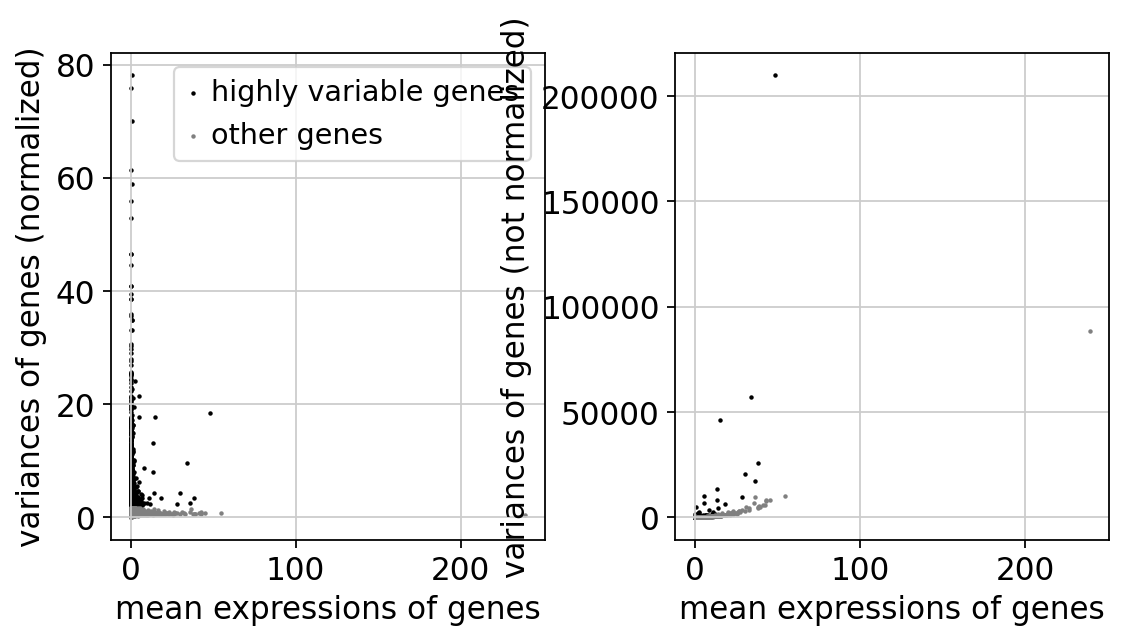

Total number of cells: 350815
Total number of genes: 3000


In [8]:
sc.pp.highly_variable_genes(adata_P13, n_top_genes=3000, flavor='seurat_v3')
sc.pl.highly_variable_genes(adata_P13)

#saving the highl variable genes
highly_variable_genes = adata_P13.var["highly_variable"]
adata_P13_downsampled = adata_P13[:, highly_variable_genes]

print('Total number of cells: {:d}'.format(adata_P13_downsampled.n_obs))
print('Total number of genes: {:d}'.format(adata_P13_downsampled.n_vars))

In [9]:
#Reading the HVG annotation done in S1
highly_variable_genes= pd.read_csv('../results/tables/highlyVariable_genes.csv', index_col=0)

highly_variable_genes

,gene_ids-0,feature_types-0,n_cells-0,gene_ids-1,feature_types-1,n_cells-1,gene_ids-10,feature_types-10,n_cells-10,gene_ids-11,...,feature_types-8,n_cells-8,gene_ids-9,feature_types-9,n_cells-9,highly_variable,highly_variable_rank,means,variances,variances_norm
AADAC,ENSG00000114771,Gene Expression,99.0,ENSG00000114771,Gene Expression,592.0,ENSG00000114771,Gene Expression,87.0,ENSG00000114771,...,Gene Expression,66.0,ENSG00000114771,Gene Expression,56.0,True,429.0,0.060715,0.852639,6.843957
AADACL2,ENSG00000197953,Gene Expression,203.0,ENSG00000197953,Gene Expression,449.0,ENSG00000197953,Gene Expression,79.0,ENSG00000197953,...,Gene Expression,16.0,ENSG00000197953,Gene Expression,88.0,True,2988.0,0.031668,0.115696,1.958146
AADACL2-AS1,ENSG00000242908,Gene Expression,1524.0,ENSG00000242908,Gene Expression,623.0,ENSG00000242908,Gene Expression,1880.0,ENSG00000242908,...,Gene Expression,452.0,ENSG00000242908,Gene Expression,1456.0,True,853.0,0.201448,2.024973,4.332867
AADACL3,ENSG00000188984,Gene Expression,111.0,ENSG00000188984,Gene Expression,36.0,ENSG00000188984,Gene Expression,75.0,ENSG00000188984,...,Gene Expression,206.0,ENSG00000188984,Gene Expression,53.0,True,1308.0,0.013087,0.069995,3.373565
ABCA12,ENSG00000144452,Gene Expression,930.0,ENSG00000144452,Gene Expression,174.0,ENSG00000144452,Gene Expression,493.0,ENSG00000144452,...,Gene Expression,1207.0,ENSG00000144452,Gene Expression,371.0,True,2015.0,0.073434,0.394451,2.549076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNRF3,ENSG00000183579,Gene Expression,1071.0,ENSG00000183579,Gene Expression,1665.0,ENSG00000183579,Gene Expression,4060.0,ENSG00000183579,...,Gene Expression,2611.0,ENSG00000183579,Gene Expression,5810.0,True,1427.0,0.604377,6.502488,3.186720
ZP3,ENSG00000188372,Gene Expression,818.0,ENSG00000188372,Gene Expression,364.0,ENSG00000188372,Gene Expression,1063.0,ENSG00000188372,...,Gene Expression,5430.0,ENSG00000188372,Gene Expression,1268.0,True,652.0,0.202303,2.395845,5.102519
ZP4,ENSG00000116996,Gene Expression,4.0,ENSG00000116996,Gene Expression,3.0,ENSG00000116996,Gene Expression,6.0,NaN,...,Gene Expression,15.0,ENSG00000116996,Gene Expression,9.0,True,1240.0,0.000528,0.002159,3.468241
ZPBP,ENSG00000042813,Gene Expression,49.0,ENSG00000042813,Gene Expression,56.0,ENSG00000042813,Gene Expression,133.0,ENSG00000042813,...,Gene Expression,150.0,ENSG00000042813,Gene Expression,145.0,True,2521.0,0.008829,0.028843,2.195207


In [10]:
#creating a new column for the highly variable genes
adata_explants.var['highly_variable']=False

#adding the True values to those genes considered as HVG
for gene in list(highly_variable_genes.index):
    adata_explants.var.at[gene, 'highly_variable']=True



In [11]:
#saving the highl variable genes
highly_variable_genes = adata_explants.var["highly_variable"]
adata_hvg = adata_explants[:, highly_variable_genes]

print('Total number of cells: {:d}'.format(adata_hvg.n_obs))
print('Total number of genes: {:d}'.format(adata_hvg.n_vars))

Total number of cells: 149617
Total number of genes: 3000


In [12]:
adata_hvg

View of AnnData object with n_obs × n_vars = 149617 × 3000
    obs: 'n_genes', 'sample', 'donor', 'termination', 'day', 'pcw', 'percent_mito', 'n_counts', 'batch', 'sample_barcode', 'souporcell_id', 'donor_deconv', 'donor_souporcell', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_pca', 'scrublet_doublet', 'leiden_scvi'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9

In [13]:
# here using only HVG overlap

# normlog, scaled and HVG subsetted 
adata_train = adata_P13_downsampled.copy()

# normlog, scaled and HVG subsetted 
adata_test = adata_hvg.copy()

In [14]:
# list of genes shared between blood and bone marrow data
# doing sorted on the overall list is VERY important for consistent ordering of the genes
common_genes = sorted(list(set(adata_train.var_names) & set(adata_test.var_names)))
print(len(common_genes),"genes are shared between annotated train and our joint data \n",
      len(set(adata_train.var_names)), 'genes in training data \n',
      len((set(adata_test.var_names))), 'genes in test joint data \n')

1841 genes are shared between annotated train and our joint data 
 3000 genes in training data 
 3000 genes in test joint data 



In [15]:
#Subseting the datasets
adata_train_copy = adata_train[:,common_genes]
adata_train_copy.var_names

Index(['AADAC', 'AADACL2', 'AADACL2-AS1', 'ABCA7', 'ABCB1', 'ABI3BP', 'ABLIM3',
       'ABTB2', 'AC003092.1', 'AC004053.1',
       ...
       'ZIC2', 'ZNF365', 'ZNF385D', 'ZNF521', 'ZNF683', 'ZNF804A', 'ZNF804B',
       'ZNRF3', 'ZPBP', 'ZPLD1'],
      dtype='object', length=1841)

In [16]:
#Subseting the datasets
adata_test_copy = adata_test[:,common_genes]
adata_test_copy.var_names

Index(['AADAC', 'AADACL2', 'AADACL2-AS1', 'ABCA7', 'ABCB1', 'ABI3BP', 'ABLIM3',
       'ABTB2', 'AC003092.1', 'AC004053.1',
       ...
       'ZIC2', 'ZNF365', 'ZNF385D', 'ZNF521', 'ZNF683', 'ZNF804A', 'ZNF804B',
       'ZNRF3', 'ZPBP', 'ZPLD1'],
      dtype='object', length=1841)

In [17]:
# checking gene correspondence - important!
list(adata_test_copy.var_names) == list(adata_train_copy.var_names)

True

In [18]:
adata_train_copy.obs

,n_genes,sample,technology,tissue,dev_age,donor,dataset,run,number_of_individuals_multiplexed,batch,percent_mito,n_counts,scrublet_score,scrublet_cluster_score,bh_pval,is_doublet,cell_type
barcode_sample,,,,,,,,,,,,,,,,,
AAACGGGCATTGGCGC-1_FCA7167219,1941,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.090287,5992.0,0.164948,0.112619,0.857143,False,dNK1
AAACGGGTCGCGATCG-1_FCA7167219,1246,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.010213,3525.0,0.050251,0.069505,0.905171,False,dT_cells
AAAGATGAGCAATATG-1_FCA7167219,1516,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.020889,4452.0,0.096774,0.087838,0.905171,False,T_cells
AAAGATGAGTTCGCGC-1_FCA7167219,2099,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.047764,6888.0,0.096774,0.112619,0.857143,False,dNK1
AAAGATGCATGTCGAT-1_FCA7167219,1636,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.024991,5882.0,0.087838,0.072727,0.905171,False,T_cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGTCAAGT-1_Pla_Camb10714920,2409,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.007270,5227.0,0.013699,0.014381,0.999631,False,uSMC
TTTGTGTTCTTAGTCT-1_Pla_Camb10714920,4129,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.002532,17379.0,0.102190,0.125000,0.886380,False,SCT
TTTGTTGGTCACAGCG-1_Pla_Camb10714920,3116,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.004499,7779.0,0.036876,0.038067,0.999631,False,HOFB


In [21]:
np.unique(adata_train_copy.obs['cell_type'],return_counts=True)

(array(['B_cells', 'DC', 'EVT_1', 'EVT_2', 'Endo_F', 'Endo_L', 'Endo_M',
        'GC', 'Granulocytes', 'HOFB', 'ILC3', 'M3', 'MO', 'NK', 'PV',
        'Plasma', 'SCT', 'T_cells', 'VCT', 'VCT_CCC', 'VCT_fusing',
        'VCT_p', 'dDC', 'dEpi_lumenal', 'dEpi_secretory', 'dM1', 'dM2',
        'dNK1', 'dNK2', 'dNK3', 'dS1', 'dS2', 'dS3', 'dT_cells', 'dT_regs',
        'eEVT', 'fF1', 'fF2', 'iEVT', 'uSMC'], dtype=object),
 array([  774,   697,  5289,  2358,  1466,  1761,  6877,    19,   195,
        10733,  2511,  1299,  3050,  5187,  9980,   255, 28177,  2126,
        23472,  3373,  1971,  6679,   694,   135, 16834, 14099,  9221,
        10450, 12487,  2952, 42586, 65746, 13197,  9740,  1862,    28,
        10420,  1396,  3676, 17043]))

## Training a logistic regression model on previously annotated 10X data from Roser+Suryawanshi

In [22]:
adata_train_copy.obs['cell_type'].head()

barcode_sample
AAACGGGCATTGGCGC-1_FCA7167219        dNK1
AAACGGGTCGCGATCG-1_FCA7167219    dT_cells
AAAGATGAGCAATATG-1_FCA7167219     T_cells
AAAGATGAGTTCGCGC-1_FCA7167219        dNK1
AAAGATGCATGTCGAT-1_FCA7167219     T_cells
Name: cell_type, dtype: category
Categories (40, object): ['B_cells', 'DC', 'EVT_1', 'EVT_2', ..., 'fF1', 'fF2', 'iEVT', 'uSMC']

In [23]:
celltypes_train = adata_train_copy.obs['cell_type']

In [24]:
adata_train_copy.X.shape

(350815, 1841)

# The following cell actually trains the model and may require quite a bit of time if you are using a big training dataset

In [25]:
#13:10
%time
# training a logistic regression model on scRNA-seq data
# takes about 5hrs for HVGs intersection
logisticRegr_sc = LogisticRegression(max_iter = 5000, n_jobs = -1, random_state = 0, C=0.2)
logisticRegr_sc.fit(adata_train_copy.X, celltypes_train)

CPU times: user 11 µs, sys: 4 µs, total: 15 µs
Wall time: 21.5 µs


/opt/conda/envs/scvi-singularity/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.2, max_iter=5000, n_jobs=-1, random_state=0)

In [26]:
# Saving model

#pkl_filename = "./logreg_from_P13_downsampled_no_soupy_genes_coarse_troph_to_all_troph_organoids_premrna_HVGs.pkl"
pkl_filename = "../results/log_regression/logreg_from_P13_downsampled_fine_troph_to_explant_premrna_HVGs_20220124.pkl"



with open(pkl_filename, 'wb') as file:  
    pickle.dump(logisticRegr_sc, file)

In [28]:
# Load model (scRNA-seq) from file

# which one?
pkl_filename = "../results/log_regression/logreg_from_P13_downsampled_fine_troph_to_explant_premrna_HVGs_20220124.pkl"

with open(pkl_filename, 'rb') as file:  
    logisticRegr_sc = pickle.load(file)

In [29]:
logisticRegr_sc

LogisticRegression(C=0.2, max_iter=5000, n_jobs=-1, random_state=0)

In [30]:
%%time
predictions = logisticRegr_sc.predict(adata_test_copy.X)
adata_test_copy.obs['celltype_predictions'] = predictions

Trying to set attribute `.obs` of view, copying.


CPU times: user 2.44 s, sys: 1.17 s, total: 3.62 s
Wall time: 3.63 s


In [31]:
%%time
# probabilities
probabilities = logisticRegr_sc.predict_proba(adata_test_copy.X)
probs_adata = []
for i,clus in enumerate(adata_test_copy.obs['celltype_predictions']):
    probs_adata.append(probabilities[i,logisticRegr_sc.classes_==clus][0])



CPU times: user 1.44 s, sys: 87.6 ms, total: 1.52 s
Wall time: 1.53 s


In [32]:
list(adata_test_copy.obs.index) == list(adata_hvg.obs.index)

True

In [33]:
adata_test_copy.obs['celltype_predictions']

Pla_HDBR10917729_AAACCCACATCGAACT    VCT_CCC
Pla_HDBR10917729_AAACCCAGTAAGACCG         PV
Pla_HDBR10917729_AAACCCAGTGGGATTG        SCT
Pla_HDBR10917729_AAACGAAAGCCTAACT        dS1
Pla_HDBR10917729_AAACGAAAGCCTGGAA        fF1
                                      ...   
Pla_HDBR11345033_TTTGTTGGTAAGATAC         MO
Pla_HDBR11345033_TTTGTTGGTCCCTGTT        fF1
Pla_HDBR11345033_TTTGTTGGTCGGCACT        dS2
Pla_HDBR11345033_TTTGTTGGTCTCCCTA        dM2
Pla_HDBR11345033_TTTGTTGGTTGTTGCA        dM1
Name: celltype_predictions, Length: 149617, dtype: object

In [34]:
# now you can return to your object transferring celltype predictions and their probabilities from training

# my test object
adata_explants.obs['celltype_predictions'] = adata_test_copy.obs.loc[adata_explants.obs_names,'celltype_predictions']
adata_explants.obs['probabilities'] = probs_adata

In [35]:
# you may want to save results at this point
adata_explants.obs.loc[:,['celltype_predictions','probabilities']].to_csv('../results/log_regression/logreg_from_P13_downsampled_fine_troph_to_explant_premrna_HVGs_predictions_20220124.csv')


